# KOH2: Sieć Kohonena na siatce sześciokątnej
Adrianna Grudzień

-> kodu nie przesyłać, tylko sprawozdanie do 20 maja do godz. 22

-> Sprawko: mają być wykonane wszystkie eksperymenty! + wnioski

Wizualizacje:
- wagi w przestrzeni 2d (wikipedia)
- albo po prostu metryki do sprawdzenia skuteczności

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
class Koh:
    def __init__(self, k, N, M, theta_fun='gauss', topology='rectangle'):
        self.k = k
        self.N = N
        self.M = M
        self.theta_fun = theta_fun
        self.topology = topology
        self.weights = np.random.uniform(-5,5,size=[self.k, self.N*self.M])
        self.positions = np.matrix([[i+0.5,j] if j%2==0 else (i,j) for i in range(self.N) for j in range(self.M)])
        
    @staticmethod
    def d(w_array,x_array):
        """Odległość euklidesowa (metryka)"""
        return np.linalg.norm(w_array-x_array)
    @staticmethod
    def distance(n1, n2):
        """Odległość między neuronami"""
        return np.abs(n1[0]-n2[0]) + np.abs(n1[1]-n2[1])
    @staticmethod
    def gauss_fun(x, t):
        """Funkcja Gaussa"""
        return np.exp(-np.square(x))
    @staticmethod
    def mexico_fun(x, t):
        """Meksykański kapelusz (-druga pochodna gauss_fun) przeskalowana do [0,1], czyli (f+1)/3"""
        return (2-4*np.square(x))*np.exp(-np.square(x) + 1) / 3
    def theta(self,n1,n2, t, width):
        """Waga sąsiedztwa wygaszana w czasie
        width - szerokość sąsiedztwa [0.1, 1]
        """
        if self.theta_fun == 'gauss':
            return Koh.gauss_fun(Koh.distance(n1,n2)*width, t)
        elif self.theta_fun == 'mexico':
            return Koh.mexico_fun(Koh.distance(n1,n2)*width, t)
    
    def alpha(self, t):
        """Wygaszanie w czasie"""
        return np.exp(-t/self.n_epochs)
    
    def draw_neurons(self, df):
        """df - ramka obserwacji wraz z kategoriami"""
        positions_x = self.positions[:,0] # położenia na OX neuronów
        positions_y = self.positions[:,1]
        
        predicted_categories = []
        for x in np.array(pd.DataFrame(df).iloc[:,:-1]):
            predicted_categories.append(self.predict_category(x))

            
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.title('Predicted categories')
        # plt.scatter(df.reshape((28,28))[:,0], df.reshape((28,28))[:,1], cmap='Paired')
        plt.scatter(np.array(positions_x.T), np.array(positions_y.T))
 
        # plt.figure(figsize=(10,4))
        # plt.subplot(1,2,1)
        # plt.title('Predicted categories')
        # plt.scatter(df.reshape((28,28))[:,0], df.reshape((28,28))[:,1], c=predicted_categories, cmap='Paired')
        # plt.scatter(positions_x, positions_y, c='black',s=100)
        # plt.subplot(1,2,2)
        # plt.title('True categories')
        # plt.scatter(df.reshape((28,28))[:,0], df.reshape((28,28))[:,1], c=df.reshape((28,28))[:,2],  cmap='Paired')
        # plt.scatter(positions_x, positions_y, c='black',s=100)
        plt.show()
    
    
    def find_the_nearest_neuron(self, x):
        """Znajdź neuron najbliższy obserwacji x"""
        distances = []
        for i in range(self.weights.shape[1]):
            distances.append(Koh.d(self.weights[:,i], x))
        return self.weights[:, np.argmin(distances)]
    
    def find_the_nearest_neuron_position(self, x):
        """Znajdź neuron najbliższy obserwacji x"""
        distances = []
        for i in range(self.weights.shape[1]):
            distances.append(Koh.d(self.weights[:,i], x))
        return self.positions[np.argmin(distances),:]
            
    def train(self, df=None, n_epochs=10, graph_period=2, width=1):
        """
        data - ramka danych wraz z kategorią (x,y,c)
        width - szerokość sąsiedztwa [0.1, 1]
        """
        self.n_epochs = n_epochs

        print('Random weights')
        self.draw_neurons(df)
        for t in range(n_epochs):
            np.random.shuffle(df)
            data = np.array(pd.DataFrame(df).iloc[:,:-1])
            for x in data:
                w_min = self.find_the_nearest_neuron(x)
                [i_min, j_min] = np.array(self.find_the_nearest_neuron_position(x))[0]
            
                for neuron_num in range(self.weights.shape[1]):
                    self.weights[:,neuron_num] += self.theta([i_min,j_min], np.array(self.positions[neuron_num,:])[0], t, width)*self.alpha(t)*(x - self.weights[:,neuron_num])
            
            if t%graph_period==0:
                print('Number of epoch: ', t)
                # self.draw_neurons(df)
                    
    def predict_category(self, x):
        """Przewidź kategorię jednej obserwacji"""
        distances = []
        for i in range(self.weights.shape[1]):
            distances.append(Koh.d(self.weights[:,i], x))
        return int(np.argmin(distances))

Random weights


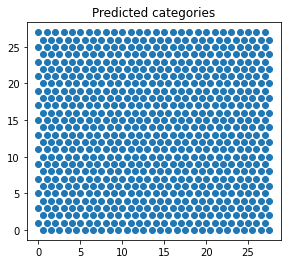

Number of epoch:  0
Number of epoch:  2
Number of epoch:  4
Number of epoch:  6
Number of epoch:  8
Number of epoch:  10


In [150]:
koh = Koh(k=784, N=28, M=28, theta_fun='gauss')
koh.train(df=np.array(train_data_with_c[:10,:]), n_epochs=11, graph_period=2)

## Pobranie zbioru `MNIST`

In [143]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
train_data_with_c = np.loadtxt('./data/mnist_train.csv', 
                        delimiter=",")

In [144]:
train_data_with_c.shape # obrazki są domyślnie spłaszczone

(60000, 785)

In [145]:
classes = train_data[:,0]
train_data = train_data_with_c[:,1:]

Class:  5


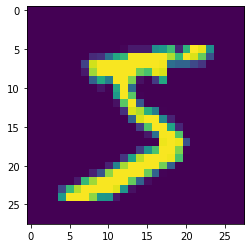

In [146]:
print('Class: ', int(classes[0]))
plt.imshow(np.reshape(train_data[0], (28,28)))
plt.show()

In [9]:
koh = Koh(k=2, N=3, M=2, theta_fun='gauss')
koh.train(df=np.array(train_data[0]), n_epochs=11, graph_period=2)

Random weights
(2,) (0,)


ValueError: operands could not be broadcast together with shapes (2,) (0,) 